# Proyek Analisis Data: Bike Sharing Dataset daily
- **Nama:** Andi Muhammad Hakam
- **Email:** andimuhammadhakam@gmail.com
- **ID Dicoding:** muhammad_hakam

# Menentukan Pertanyaan Bisnis
- Jenis musim apa yang paling banyak diminati oleh penyewa sepeda?
- Bagaimana hari libur/hari kerja dan musim mempengaruhi permintaan sewa sepeda?
- Bagaimana Pengaruh Cuaca Terhadap Jumlah penyewa sepeda?
- Bagaimana tren penyewaan sepeda dalam setahun? 
- Bagaimana tren penyewa kategori casual dan registred?
- Bagaimana hubungan temp, atemp, dan windspeed terhadap jumlah penyewa sepeda?

## Import Semua Packages/Library yang Digunakan

Sebelum memulai proyek, paastikan telah mengimport semua library yang dibutuhkan untuk mengerjakan proyek.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import streamlit as st
import numpy as np
import seaborn as sns
import warnings
from datetime import datetime   
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

## Data Wrangling

### Gathering Data

Tahap Gathering data adalah tahap pengumpulan data sebelum melakukan analisis. Dataset yang digunakan adalah dataset **Bike Sharing** yaitu **day.csv**

In [2]:
day = pd.read_csv('day.csv', sep=',')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assesing Data

Mengecek tipe data dan missing value

In [3]:
list_item = [] 
for col in day.columns: 
    list_item.append([col, day[col].dtype, 
                      day[col].isna().sum(), 
                      100*day[col].isna().sum()/len(day[col]), 
                      day[col].nunique(), 
                      day[col].unique()[:30]]) 

desc_df = pd.DataFrame(data=list_item, columns='Feature,Data Type,Null, Null (%),Unique,Unique Sample'.split(","))
desc_df

,Feature,Data Type,Null,Null (%),Unique,Unique Sample
0,instant,int64,0,0.0,731,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,dteday,object,0,0.0,731,"[2011-01-01, 2011-01-02, 2011-01-03, 2011-01-0..."
2,season,int64,0,0.0,4,"[1, 2, 3, 4]"
3,yr,int64,0,0.0,2,"[0, 1]"
4,mnth,int64,0,0.0,12,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
5,holiday,int64,0,0.0,2,"[0, 1]"
6,weekday,int64,0,0.0,7,"[6, 0, 1, 2, 3, 4, 5]"
7,workingday,int64,0,0.0,2,"[0, 1]"
8,weathersit,int64,0,0.0,3,"[2, 1, 3]"
9,temp,float64,0,0.0,499,"[0.344167, 0.363478, 0.196364, 0.2, 0.226957, ..."


Pada tabel tersebut terlihat informasi bahwa dataset ini tidak mengandung nilai null atau missing value

Statistika Deskriptif Data

In [4]:
round(day.describe(),2)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.00,731.00,731.0,731.00,731.00,731.0,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00
mean,366.00,2.50,0.5,6.52,0.03,3.0,0.68,1.40,0.50,0.47,0.63,0.19,848.18,3656.17,4504.35
std,211.17,1.11,0.5,3.45,0.17,2.0,0.47,0.54,0.18,0.16,0.14,0.08,686.62,1560.26,1937.21
min,1.00,1.00,0.0,1.00,0.00,0.0,0.00,1.00,0.06,0.08,0.00,0.02,2.00,20.00,22.00
25%,183.50,2.00,0.0,4.00,0.00,1.0,0.00,1.00,0.34,0.34,0.52,0.13,315.50,2497.00,3152.00
50%,366.00,3.00,1.0,7.00,0.00,3.0,1.00,1.00,0.50,0.49,0.63,0.18,713.00,3662.00,4548.00
75%,548.50,3.00,1.0,10.00,0.00,5.0,1.00,2.00,0.66,0.61,0.73,0.23,1096.00,4776.50,5956.00
max,731.00,4.00,1.0,12.00,1.00,6.0,1.00,3.00,0.86,0.84,0.97,0.51,3410.00,6946.00,8714.00


Tabel describe menunjukkan bahwa tidak terdapat sebuah keanehan pada data ini berdasarkan statistik

Mengecek Jumlah duplikasi data

In [5]:
print("Jumlah duplikasi data: ", day.duplicated().sum())

Jumlah duplikasi data:  0


### Cleansing Data

dteday

In [6]:
day['dteday'] = pd.to_datetime(day['dteday'], format ='%Y-%m-%d' ).dt.date

yr

In [7]:
def ubah_year(x):
    if x == 0:
        return 2011
    else:
        return 2012
day['yr'] = day['yr'].apply(ubah_year).astype(int)

Mnth

In [8]:
day['mnth'] = pd.Categorical(day['mnth'].map(lambda x: ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'][x - 1]), 
            categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True)

season

In [9]:
def ubah_season(x):
    if x == 1:
        return 'Musim Semi'
    elif x == 2:
        return 'Musim Panas'
    elif x == 3:
        return 'Musim Gugur'
    else:
        return 'Musim Dingin'
day['season']=day['season'].apply(ubah_season)

workingday

In [10]:
def working (x):
    if x == 1:
        return 'Hari Libur'
    else:
        return 'Bukan Hari Libur'

day['workingday']=day['workingday'].apply(working)

weathersit

In [11]:
def situasi_cuaca(x):
    if x == 1:
        return 'Cuaca Cerah'
    elif x == 2:
        return 'Cuaca Berkabut'
    elif x == 3:
        return 'Cuaca Hujan'
    else:
        return 'Cuaca Ekstrem'
day['weathersit']=day['weathersit'].apply(situasi_cuaca)

Kolom yang didrop

In [12]:
day=day.drop(["instant", "holiday", "weekday"], axis=1)

In [13]:
day.head(5)

,dteday,season,yr,mnth,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Musim Semi,2011,Jan,Bukan Hari Libur,Cuaca Berkabut,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Musim Semi,2011,Jan,Bukan Hari Libur,Cuaca Berkabut,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Musim Semi,2011,Jan,Hari Libur,Cuaca Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Musim Semi,2011,Jan,Hari Libur,Cuaca Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Musim Semi,2011,Jan,Hari Libur,Cuaca Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Explaratory Data Analysis (EDA)

### Eksplorasi day dataset

1. Jumlah penyewa sepeda pada masing-masing bulan

In [14]:
day.groupby(by='mnth').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
       max   min         mean     sum
mnth                                 
Jan   4521   431  2176.338710  134933
Feb   5062  1005  2655.298246  151352
Mar   8362   605  3692.258065  228920
Apr   7460   795  4484.900000  269094
May   8294  2633  5349.774194  331686
Jun   8120  3767  5772.366667  346342
Jul   8173  3285  5563.677419  344948
Aug   7865  1115  5664.419355  351194
Sep   8714  1842  5766.516667  345991
Oct   8156    22  5199.225806  322352
Nov   6852  1495  4247.183333  254831
Dec   6606   441  3403.806452  211036

Jumlah penyewaan sepeda teratas terjadi pada bulan Agustus 351194

2. Jumlah penyewa sepeda pada masing-masing cuaca

In [15]:
day.groupby(by='weathersit').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
                 max  min         mean      sum
weathersit                                     
Cuaca Berkabut  8362  605  4035.862348   996858
Cuaca Cerah     8714  431  4876.786177  2257952
Cuaca Hujan     4639   22  1803.285714    37869

Cuaca Cerah adalah pilihan yang paling banyak digemari oleh penyewa sepeda. Hal tersebut terlihat jumlah penyewa sepeda tertinggi terjadi pada cuaca cerah

3. Jumlah penyewa sepeda pada hari libur/bukan hari libur

In [16]:
day.groupby(by='workingday').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
                   max  min         mean      sum
workingday                                       
Bukan Hari Libur  8714  605  4330.168831  1000269
Hari Libur        8362   22  4584.820000  2292410

Secara nilai max dan min, 'Bukan Hari Libur' memiliki jumlah penyewa sepeda tertinggi. Akan tetapi bila ditotal secara keseluruhan, 'Hari Libur' memiliki jumlah penyewa sepeda tertinggi yang artinya banyak penyewa sepeda lebih memiih menyewa sepeda hari libu dibandingkan di luar hari libur

4. Jumlah penyewa sepeda berdasarkan musim

In [17]:
day.groupby(by='season').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                            
               max   min         mean      sum
season                                        
Musim Dingin  8555    22  4728.162921   841613
Musim Gugur   8714  1115  5644.303191  1061129
Musim Panas   8362   795  4992.331522   918589
Musim Semi    7836   431  2604.132597   471348

Berdasarkan dari tabel didapatkan informasi bahwa banyak penyewa sepeda menyukai melakukan aktivitas bersepeda pada Musim Gugur dan Musim yang paling rendah peminatnya adalah Musim Semi.

5. Pengelompokan temp, atemp, dan windspeed 

In [18]:
day.groupby(by='season').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'windspeed': ['max', 'min', 'mean']
})
     

temp                         atemp                      \
                   max       min      mean       max       min      mean   
season                                                                     
Musim Dingin  0.657500  0.220833  0.422906  0.607975  0.227913  0.415539   
Musim Gugur   0.861667  0.469167  0.706309  0.840896  0.242400  0.655898   
Musim Panas   0.808333  0.253043  0.544405  0.757579  0.250339  0.520307   
Musim Semi    0.572500  0.059130  0.297748  0.548617  0.079070  0.296914   

             windspeed                      
                   max       min      mean  
season                                      
Musim Dingin  0.422275  0.022392  0.171995  
Musim Gugur   0.375617  0.064071  0.172095  
Musim Panas   0.388067  0.065929  0.203507  
Musim Semi    0.507463  0.045408  0.214537

Berdasarkan hasil analisis diatas, dapat disimpulkan beberapa pernyataan sebagai berikut:

- Rata-rata temperatur dan atemp tertinggi terjadi pada Musim Gugur yang selanjutnya diikuti 3 musim lainnya.
- Rata-rata kecepatan angin tertinggi terjadi pada Musim Dingin yang selanjutnya diikuti 3 musim lainnya.

6. Hubungan antara penyewa casual, registered, dan count

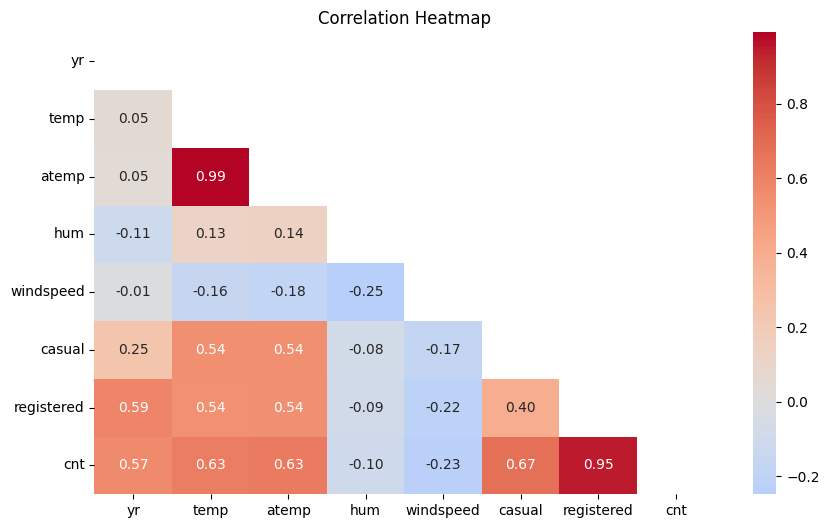

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = day.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Berdasarkan hasil analisis diatas, didapat pernyataan sebagai berikut:

- atemp dan temp sangat berkorelasi (0.99).
- hum memiliki korelasi lemah dengan temp dan atemp (0.13 dan 0.14).
- windspeed memiliki korelasi lemah dengan cnt,registered, dan casual (-0.23, -0.22, dan -0.17)
- casual cukup berkorelasi dengan temp dan atemp (0.54), dan berkorelasi lemah dengan hum dan windspeed (-0.08 dan -0.17).
- registered memiliki pola yang sama seperti casual, dan berkorelasi moderat dengan casual (0.40).
- cnt berkorelasi kuat dengan temp, atemp, casual, dan registered (0.63, 0.63, 0.67, dan 0.95), dan sedikit negatif dengan hum dan windspeed(-0.10 dan -0.23).

## Visualization & Explanatory Analysis

### No. 1: Jenis musim apa yang paling banyak diminati oleh penyewa sepeda?

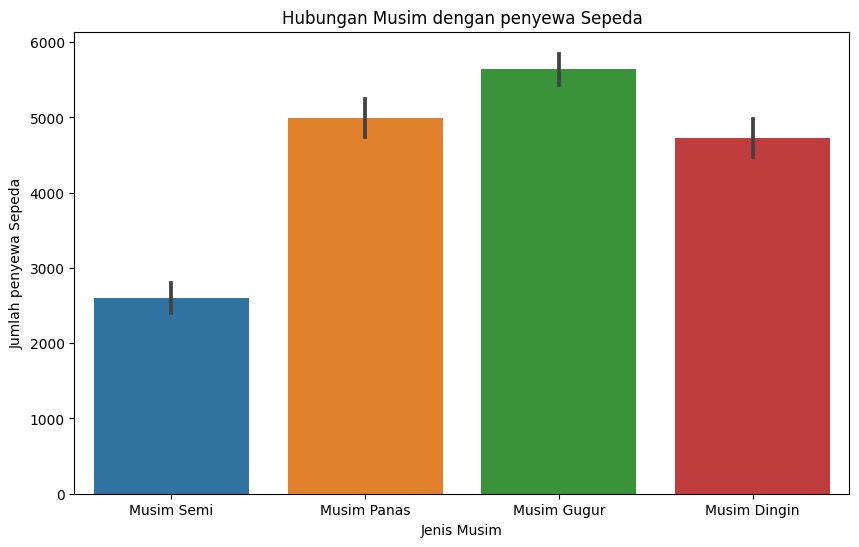

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='season',
    y='cnt',
    data=day)

plt.title('Hubungan Musim dengan penyewa Sepeda')
plt.xlabel('Jenis Musim')
plt.ylabel('Jumlah penyewa Sepeda')
plt.show()

Berdasarkan Visualisasi di atas, terlihat bahwa terdapat hubungan antara musim dengan jumlah penyewa sepeda. Musim gugur adalah musim yang paling diminati oleh penyewa sepeda dan disusul pada musim panas. Untuk melihat jumlah pasti penyewa sepeda pada ke empat musim tersebut, dapat dilihat pada bar plot berikut:

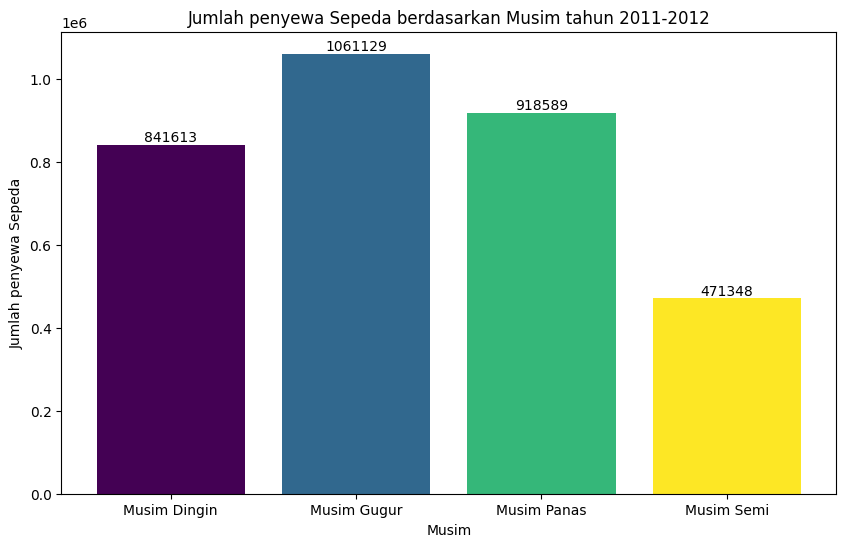

In [21]:
# Mengelompokkan data berdasarkan musim dan menghitung total penyewaan
seasonal_rentals = day.groupby('season')['cnt'].sum().reset_index()

# Membuat bar plot
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(seasonal_rentals)))
bars = plt.bar(seasonal_rentals['season'], seasonal_rentals['cnt'], color=colors)
plt.xlabel('Musim')
plt.ylabel('Jumlah penyewa Sepeda')
plt.title('Jumlah penyewa Sepeda berdasarkan Musim tahun 2011-2012')
plt.xticks(ticks=seasonal_rentals['season'])

# Menambahkan anotasi jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

Dari barplot tersebut didapatkan informasi bahwa jumlah penyewa sepeda pada musim gugur sebanyak 1061129, musim panas sebanyak 918589, musim dingin sebanyak 841613, dan musim semi sebanyak 471348 untuk tahun 2011 hingga 2012.

### No. 2: Bagaimana hari libur/hari kerja dan musim mempengaruhi permintaan sewa sepeda?

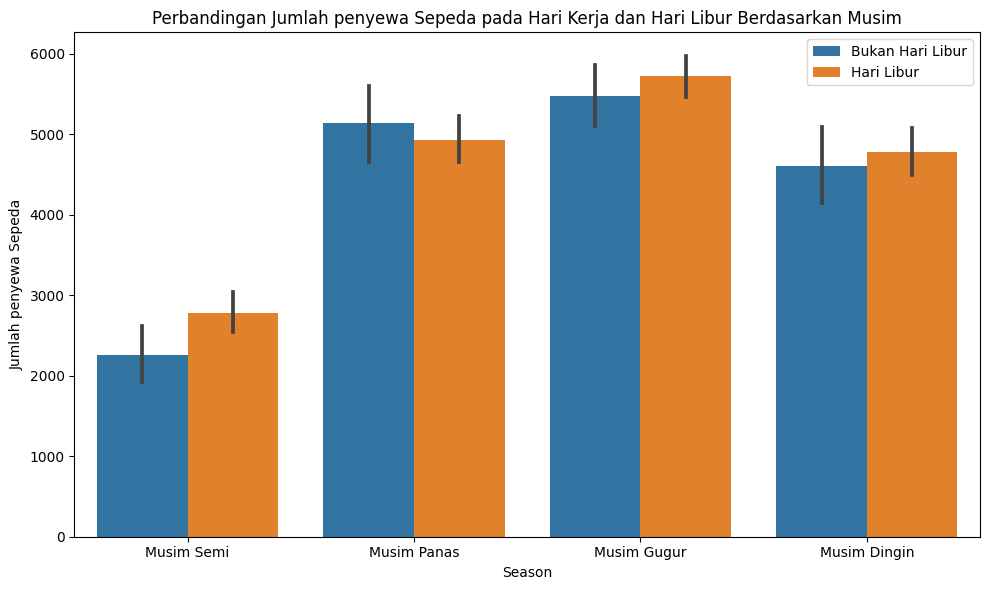

In [22]:
# Mengatur tampilan grafik
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', hue='workingday', data=day)

# Menambahkan judul dan label
plt.title('Perbandingan Jumlah penyewa Sepeda pada Hari Kerja dan Hari Libur Berdasarkan Musim')
plt.xlabel('Season')
plt.ylabel('Jumlah penyewa Sepeda')
plt.legend()

# Menampilkan grafik
plt.tight_layout()
plt.show()

Dari grafik, terlihat bahwa jumlah penyewa sepeda cenderung lebih tinggi pada hari libur dibandingkan di hari luar hari libur, terutama pada musim gugur, dingin, dan semi. Hal ini memungkinkan bahwa orang-orang lebih cenderung bersepeda untuk rekreasi dan sejenisnya saat hari libur.

### No. 3: Bagaimana Pengaruh Cuaca Terhadap Jumlah penyewa sepeda?

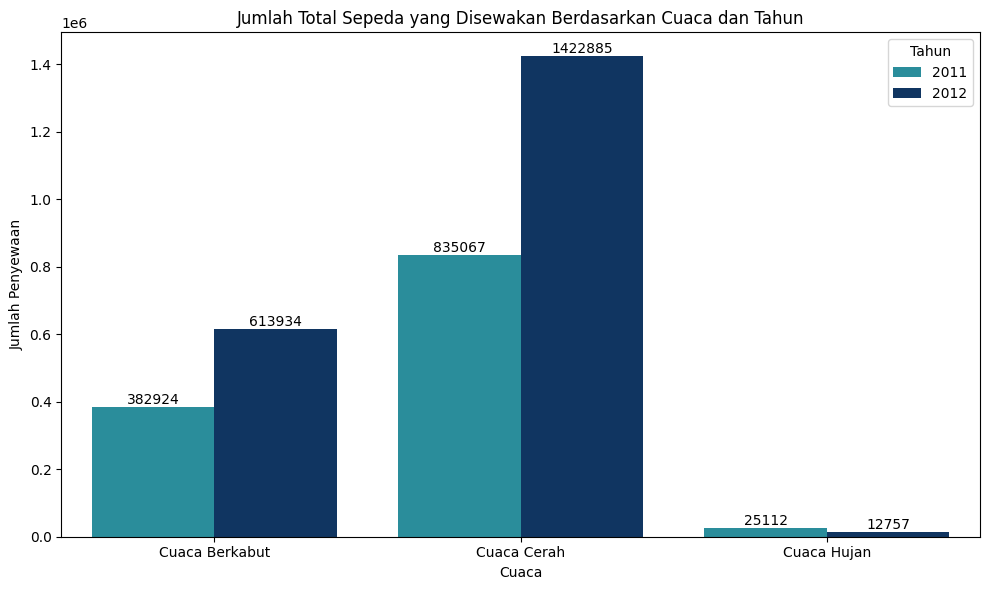

In [23]:
# Mengelompokkan data berdasarkan musim dan menghitung total penyewaan
seasonal_rentals = day.groupby(['weathersit', 'yr'])['cnt'].sum().reset_index()

# Memfilter untuk tahun 2011 dan 2012
seasonal_rentals_filtered = seasonal_rentals[seasonal_rentals['yr'].isin([2011, 2012])]

# Membuat bar plot
plt.figure(figsize=(10, 6))
bars = sns.barplot(
    data=seasonal_rentals_filtered,
    x="weathersit",
    y="cnt",
    hue="yr",
    palette=["#179BAE", "#03346E"]
)

# Menambahkan anotasi jumlah di atas setiap bar
for bar in bars.patches:  # Menggunakan bars.patches untuk mendapatkan semua bar
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.title("Jumlah Total Sepeda yang Disewakan Berdasarkan Cuaca dan Tahun")
plt.xlabel("Cuaca")
plt.ylabel("Jumlah Penyewaan")
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

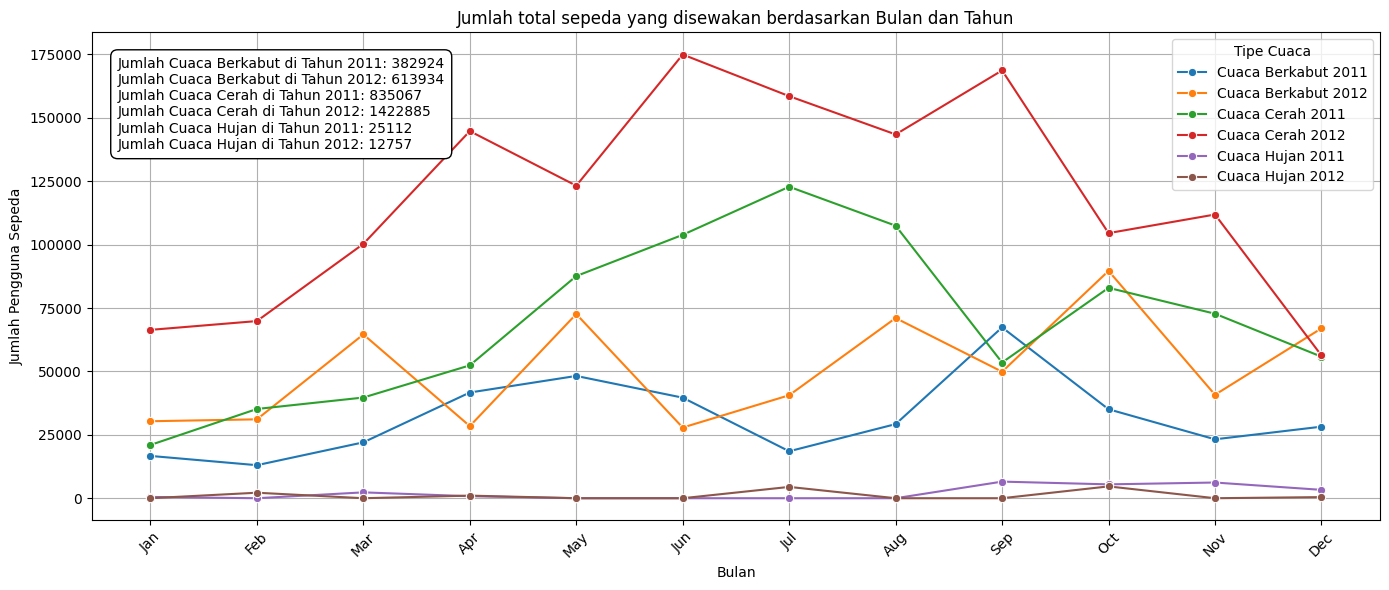

In [38]:
# Menghitung jumlah total berdasarkan bulan dan tahun untuk setiap kategori cuaca
monthly_counts = day.groupby(by=["mnth", "yr", "weathersit"]).agg({"cnt": "sum"}).reset_index()
total_counts = monthly_counts.groupby(['yr', 'weathersit'])['cnt'].sum().reset_index()

# Membuat grafik garis
plt.figure(figsize=(14, 6))

# Menggambar garis untuk setiap kategori cuaca tahun 2011 dan 2012
for weather in monthly_counts['weathersit'].unique():
    for year in [2011, 2012]:
        sns.lineplot(data=monthly_counts[(monthly_counts['yr'] == year) & (monthly_counts['weathersit'] == weather)], 
                     x="mnth", 
                     y="cnt", 
                     label=f"{weather} {year}", 
                     marker="o")

# Menyiapkan keterangan jumlah total untuk setiap kategori cuaca
total_legend_labels = []
for weather in total_counts['weathersit'].unique():
    for index, row in total_counts[total_counts['weathersit'] == weather].iterrows():
        total_legend_labels.append(f"Jumlah {weather} di Tahun {row['yr']}: {row['cnt']}")

# Menampilkan legend jumlah total dengan latar belakang
plt.text(0.02, 0.95, "\n".join(total_legend_labels), 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Menampilkan legend untuk garis di sudut kanan atas
plt.legend(title="Tipe Cuaca", loc="upper right")

plt.title("Jumlah total sepeda yang disewakan berdasarkan Cuaca")
plt.xlabel('Bulan')
plt.ylabel('Jumlah penyewa Sepeda')
plt.xticks(rotation=45)
plt.grid(True)  # Menambahkan grid untuk membantu visualisasi
plt.tight_layout()
plt.show()

Berdasarkan grafik batang dan grafik garis di atas, terlihat bahwa orang cenderung lebih banyak bersepeda pada cuaca cerah dibandingkan dengan cuaca berkabut atau hujan. Pada tahun 2011, terjadi peningkatan jumlah penyewa sepeda sebesar 54,14% dari cuaca berkabut ke cuaca cerah, dan pada tahun 2012, peningkatan tersebut mencapai 56,85%. Dari hal itu dapat disimpulkan bahwa cuaca sangat mempengaruhi peningkatan jumlah penyewaan sepeda.

### No. 4: Bagaimana tren penyewaan sepeda dalam setahun?

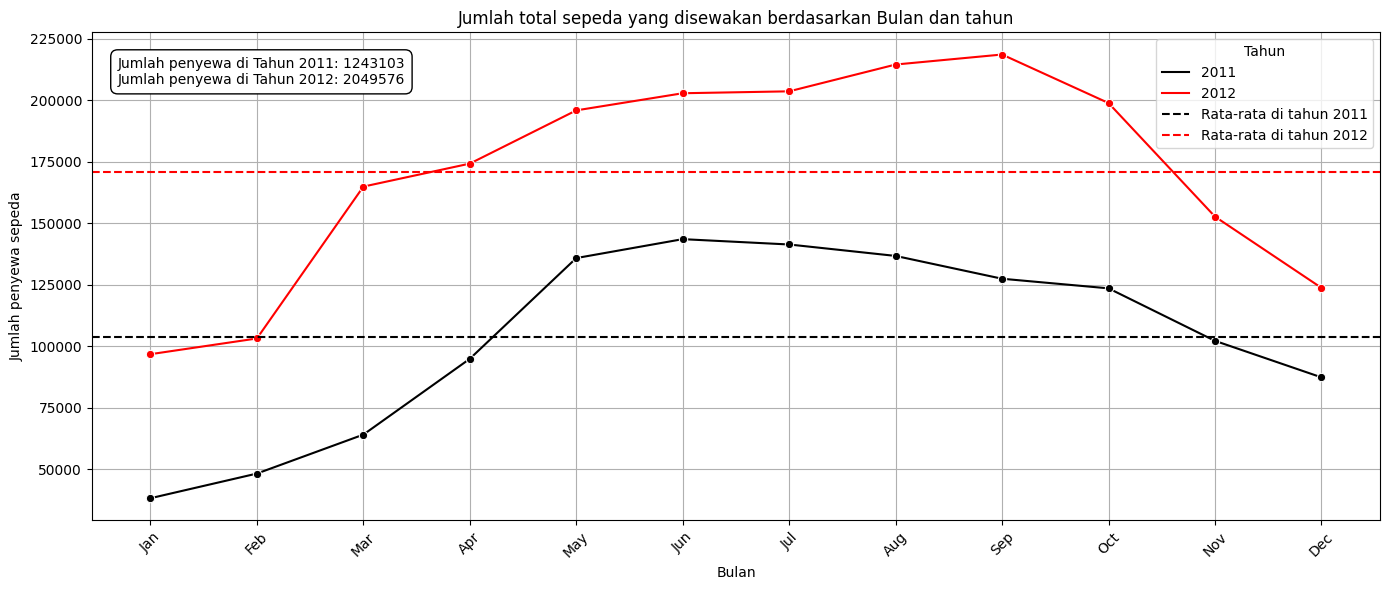

In [24]:
monthly_counts = day.groupby(by=["mnth", "yr"]).agg({"cnt": "sum"}).reset_index()
average_counts1 = monthly_counts.groupby("yr")["cnt"].mean().reset_index()
average_counts1.rename(columns={"cnt": "avg_cnt"}, inplace=True)
# Menghitung jumlah total berdasarkan tahun
total_counts = monthly_counts.groupby('yr')['cnt'].sum().reset_index()

plt.figure(figsize=(14, 6))

sns.lineplot(data=monthly_counts, 
             x="mnth", 
             y="cnt", 
             hue="yr", 
             palette=["#000000", "#FF0000"], 
             marker="o")

for index, row in average_counts1.iterrows():
    plt.axhline(y=row['avg_cnt'], color='black' if row['yr'] == 2011 else 'red', linestyle='--', label=f'Rata-rata di tahun {int(row["yr"])}')

total_legend_labels = []
for index, row in total_counts.iterrows():
    total_legend_labels.append(f"Jumlah penyewa di Tahun {row['yr']}: {row['cnt']}")

# Menampilkan legend jumlah total dengan latar belakang
plt.text(0.02, 0.95, "\n".join(total_legend_labels), 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.title("Jumlah total sepeda yang disewakan berdasarkan Bulan dan tahun")
plt.xlabel('Bulan')
plt.ylabel('Jumlah penyewa sepeda')
plt.xticks(rotation=45)
plt.grid(True)  # Menambahkan grid untuk membantu visualisasi
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

Rata-rata jumlah penyewa sepeda pada tahun 2011 sebesar 103591 dan untuk tahun 2012 sebesar 170798 yang artinya terjadi kenaikan penyewa sepeda sebesar 39.34% dari tahun 2011 ke 2012. Dari tren tersebut terbentuk juga sebuah pola yang hampir serupa akan tetapi tak sama. Jumlah penyewa sepeda tertinggi pada tahun 2011 terjadi pada bulan Juni 143512 penyewa dan untuk di tahun 2012 terjadi pada bulan September sebanyak 218573 penyewa

### No. 5 Bagaimana tren penyewa kategori casual dan registred?

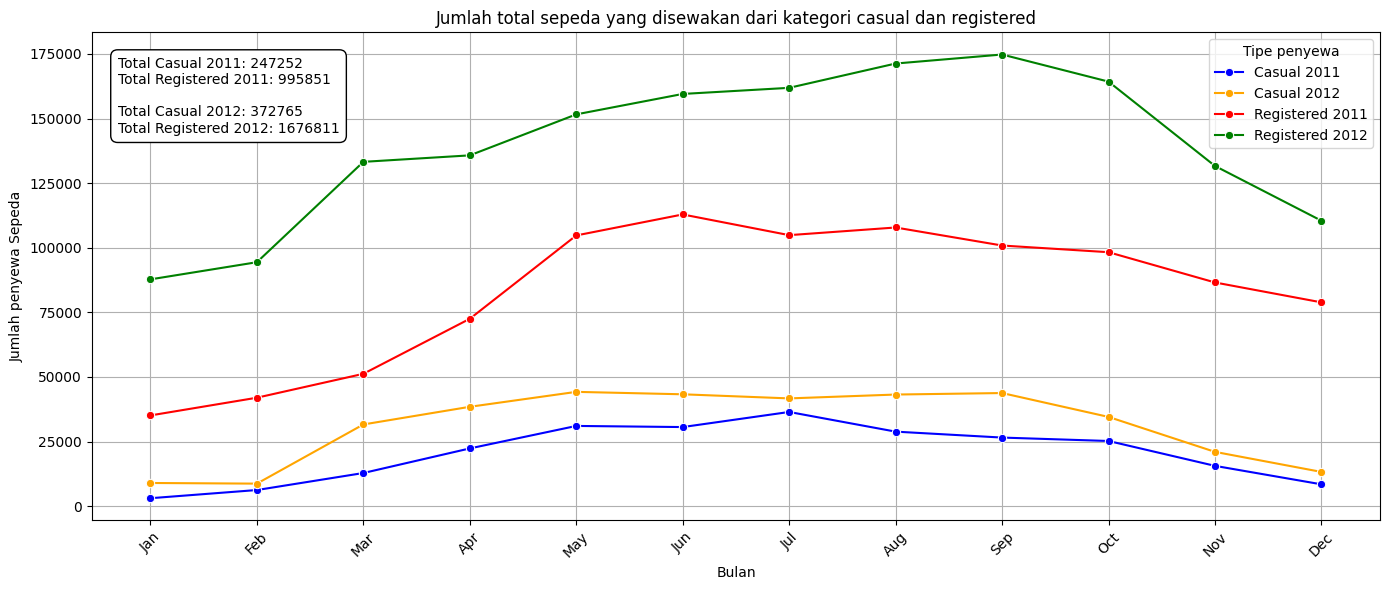

In [25]:
# Menghitung jumlah total berdasarkan bulan dan tahun
monthly_counts = day.groupby(by=["mnth", "yr"]).agg({"casual": "sum", "registered": "sum"}).reset_index()

# Menghitung jumlah total berdasarkan tahun
total_counts = monthly_counts.groupby('yr')[['casual', 'registered']].sum().reset_index()

# Membuat grafik garis
plt.figure(figsize=(14, 6))

# Menggambar garis untuk penyewa casual tahun 2011 dan 2012
sns.lineplot(data=monthly_counts[monthly_counts['yr'] == 2011], 
             x="mnth", 
             y="casual", 
             label="Casual 2011", 
             color='blue',
             marker="o")

sns.lineplot(data=monthly_counts[monthly_counts['yr'] == 2012], 
             x="mnth", 
             y="casual", 
             label="Casual 2012", 
             color='orange', 
             marker="o")

# Menggambar garis untuk penyewa registered tahun 2011 dan 2012
sns.lineplot(data=monthly_counts[monthly_counts['yr'] == 2011], 
             x="mnth", 
             y="registered", 
             label="Registered 2011", 
             color='red',
             marker="o")

sns.lineplot(data=monthly_counts[monthly_counts['yr'] == 2012], 
             x="mnth", 
             y="registered", 
             label="Registered 2012", 
             color='green',
             marker="o")

# Menampilkan legend untuk garis di sudut kanan atas
plt.legend(title="Tipe penyewa", loc="upper right")

total_legend_labels = []
for index, row in total_counts.iterrows():
    total_legend_labels.append(f"Total Casual {row['yr']}: {row['casual']}")
    total_legend_labels.append(f"Total Registered {row['yr']}: {row['registered']}")
    if index == 0:  # Menambahkan spasi setelah tahun 2011
        total_legend_labels.append("")  # Menambahkan baris kosong

# Menampilkan legend jumlah total dengan latar belakang
plt.text(0.02, 0.95, "\n".join(total_legend_labels), 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.title("Jumlah total sepeda yang disewakan dari kategori casual dan registered")
plt.xlabel('Bulan')
plt.ylabel('Jumlah penyewa Sepeda')
plt.xticks(rotation=45)
plt.grid(True)  # Menambahkan grid untuk membantu visualisasi
plt.tight_layout()
plt.show()

Pada tren tersebut didapatkan informasi bahwa kebanyakan penyewa sepeda adalah dari kategori Registered. Terlihat juga terbentuk pola yang serupa tahun 2011 dan 2012 sehingga bisa diasumsikan bahwa tahun 2013 akan memiliki pola yang sama. Kenaikan jumlah penyewa sepeda kategori Casual dari tahun 2011 hingga 2012 sebesar 33.67% dan untuk kategori Registered dari tahun 2011 hingga 2012 sebesar 40.61%.

Pada tren tersebut juga terlihat bahwa kebanyakan penyewa sepeda didominasi oleh penyewa yang berkategori Registered. Total kategori Registered pada tahun 2011 sebanyak 995851 dan di tahun 2012 sebanyak 1676811. Untuk kategori Casual, di tahun 2012 sebanyak 247252 dan di tahun 2012 sebanyak 372765. 

### No 6: Bagaimana hubungan temp, atemp, dan windspeed terhadap jumlah penyewa sepeda?

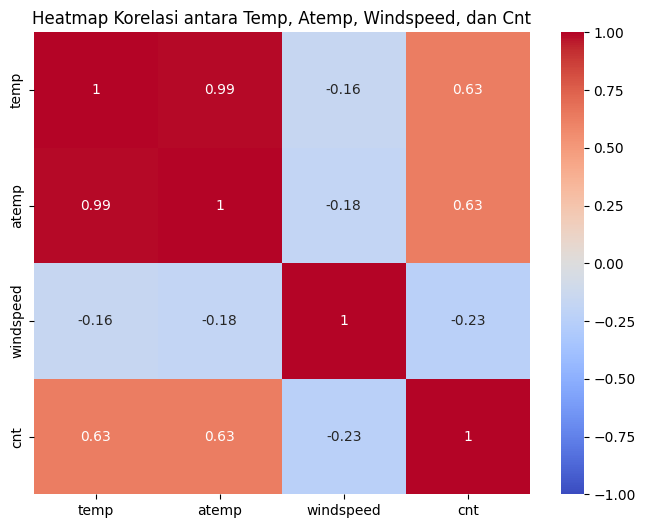

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung matriks korelasi
correlation_matrix = day[['temp', 'atemp', 'windspeed', 'cnt']].corr()

# Membuat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap Korelasi antara Temp, Atemp, Windspeed, dan Cnt')
plt.show()


In [198]:
print(correlation_matrix)

               temp     atemp  windspeed       cnt
temp       1.000000  0.991702  -0.157944  0.627494
atemp      0.991702  1.000000  -0.183643  0.631066
windspeed -0.157944 -0.183643   1.000000 -0.234545
cnt        0.627494  0.631066  -0.234545  1.000000


Temp dan Atemp tentu memiliki korelasi positif yang sangat kuat mengingat kedua hal tersebut sama-sama mengukur temperature dalam satuan celcius. Dan dapat disimpulkan temprature memiliki korelasi positif yang kuat terhadap penyewa sepeda sehingga semakin tinggi temprature maka penyewa sepeda meningkat. 

Dan untuk korelasi windspeed dengan jumlah penyewa sepeda yaitu berkorelasi negatif cenderung lemah yang artinya ketika kecepatan angin meningkat, jumlah penyewa sepeda cenderung sedikit menurun. Meskipun pengaruhnya tidak besar, angin yang lebih kencang akan membuat penyewa sepeda sedikit berkurang.